### Joris

In [3]:
import pandas as pd
import matplotlib.pyplot as plt	
import seaborn as sns
import os
import glob
from pykalman import KalmanFilter
import numpy as np
import matplotlib.ticker as ticker

In [4]:
accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Accelerometer.csv")
barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Barometer.csv")
gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Gyroscope.csv")
linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Linear Accelerometer.csv")
location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Location.csv")
magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Magnetometer.csv")
proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Proximity.csv")

In [ ]:
def plot_sensor_data_plt(sensor_data_dict, time_col="Time (s)"):
    fig, axs = plt.subplots(len(sensor_data_dict), 1, figsize=(15, 20), sharex=True)

    if len(sensor_data_dict) == 1:
        axs = [axs]

    for ax, (label, df) in zip(axs, sensor_data_dict.items()):
        if time_col not in df.columns:
            continue
        df = df.dropna()  # Verwijder lege rijen

        time = df[time_col]
        for col in df.columns:
            if col == time_col:
                continue
            ax.plot(time, df[col], label=col)

        ax.set_title(label)
        ax.legend(loc='upper right')
        ax.grid(False)  # Verwijder gridlines

    axs[-1].set_xlabel('Time (s)')
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_sensor_data(sensor_data_dict, time_col="Time (s)", dpi=300,
                              palette=["#FF5733", "#33FF57", "#3357FF"], linewidth=1):
    sns.set(style="whitegrid", context="talk", font_scale=1.1)
    num_plots = len(sensor_data_dict)
    
    fig, axs = plt.subplots(num_plots, 1, figsize=(18, 5 * num_plots), sharex=True, dpi=dpi)
    if num_plots == 1:
        axs = [axs]

    for ax, (label, df) in zip(axs, sensor_data_dict.items()):
        if time_col not in df.columns:
            continue

        df_long = df.melt(id_vars=[time_col], var_name="Sensor Axis", value_name="Value")

        sns.set_palette(palette)
        sns.lineplot(data=df_long, x=time_col, y="Value", hue="Sensor Axis", ax=ax, linewidth=linewidth)

        ax.set_title(label, weight='bold', fontsize=14)
        ax.set_ylabel("Value")
        ax.grid(False)

        # Legend outside
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.85, box.height])  # Shrink plot to make space
        ax.legend(title="Axis", loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize='small', title_fontsize='small')

        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:g}'))

    axs[-1].set_xlabel("Time (s)", weight='bold')
    
    plt.show()

In [27]:
sensor_data_dict_metro = {
    "Accelerometer": accelerometer_df,
    "Gyroscope": gyroscope_df,
    "Linear Accelerometer": linear_accelerometer_df,
    "Magnetometer": magnetometer_df,
    "Barometer": barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}




In [ ]:
plot_sensor_data(sensor_data_dict)

In [5]:
auto_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Accelerometer.csv")
auto_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Barometer.csv")
auto_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Gyroscope.csv")
auto_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Linear Accelerometer.csv")
auto_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Location.csv")
auto_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Magnetometer.csv")
auto_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Proximity.csv")

In [15]:
sensor_data_dict_auto = {
    "Accelerometer": auto_accelerometer_df,
    "Gyroscope": auto_gyroscope_df,
    "Linear Accelerometer": auto_linear_accelerometer_df,
    "Magnetometer": auto_magnetometer_df,
    "Barometer": auto_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}



In [ ]:
plot_sensor_data(sensor_data_dict_auto)

In [6]:
ren_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Accelerometer.csv")
ren_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Barometer.csv")
ren_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Gyroscope.csv")
ren_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Linear Accelerometer.csv")
ren_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Location.csv")
ren_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Magnetometer.csv")
ren_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_rennen_puck\Proximity.csv")

In [16]:
sensor_data_dict_rennen = {
    "Accelerometer": ren_accelerometer_df,
    "Gyroscope": ren_gyroscope_df,
    "Linear Accelerometer": ren_linear_accelerometer_df,
    "Magnetometer": ren_magnetometer_df,
    "Barometer": ren_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}



In [ ]:
plot_sensor_data(sensor_data_dict_rennen)

In [7]:
fiets_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Accelerometer.csv")
fiets_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Barometer.csv")
fiets_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Gyroscope.csv")
fiets_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Linear Accelerometer.csv")
fiets_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Location.csv")
fiets_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Magnetometer.csv")
fiets_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_2_fietsen_puck\Proximity.csv")


In [17]:
sensor_data_dict_fietsen = {
    "Accelerometer": fiets_accelerometer_df,
    "Gyroscope": fiets_gyroscope_df,
    "Linear Accelerometer": fiets_linear_accelerometer_df,
    "Magnetometer": fiets_magnetometer_df,
    "Barometer": fiets_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}




In [ ]:
plot_sensor_data(sensor_data_dict_fietsen)

In [8]:
trein_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Accelerometer.csv")
trein_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Barometer.csv")
trein_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Gyroscope.csv")
trein_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Linear Accelerometer.csv")
trein_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Location.csv")
trein_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Magnetometer.csv")
trein_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_trein_sjoerd\Proximity.csv")


In [18]:
sensor_data_dict_trein = {
    "Accelerometer": trein_accelerometer_df,
    "Gyroscope": trein_gyroscope_df,
    "Linear Accelerometer": trein_linear_accelerometer_df,
    "Magnetometer": trein_magnetometer_df,
    "Barometer": trein_barometer_df,
    # Voeg hier eventueel meer sensoren toe indien beschikbaar
}



In [ ]:
plot_sensor_data(sensor_data_dict_trein, dpi=300)

In [ ]:
def create_summary_table(sensor_data_dict, mode_name):
    summaries = []
    for sensor_name, df in sensor_data_dict.items():
        desc = df.describe().T[['mean', 'std', 'min', 'max', 'count']]
        desc['sensor'] = sensor_name
        desc['feature'] = desc.index
        desc['mode'] = mode_name
        summaries.append(desc.reset_index(drop=True))
    
    summary_df = pd.concat(summaries, ignore_index=True)
    summary_df = summary_df[['mode', 'sensor', 'feature', 'count', 'mean', 'std', 'min', 'max']]
    return summary_df

# Voorbeeld met meerdere modi
summary_fietsen = create_summary_table(sensor_data_dict_fietsen, "Bike")
summary_auto = create_summary_table(sensor_data_dict_auto, "Car")
summary_runnen = create_summary_table(sensor_data_dict_rennen, "Running")
summary_trein = create_summary_table(sensor_data_dict_trein, "Train")
summary_metro = create_summary_table(sensor_data_dict, "Metro")

# Alles combineren in één grote tabel
combined_summary = pd.concat([summary_fietsen, summary_auto, summary_metro, summary_trein, summary_runnen], ignore_index=True)

print(combined_summary.head())
combined_summary.to_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\summary_sensor_data.csv", index=False)

Kalman

In [ ]:
def apply_kalman_and_impute(df, columns, time_col="Time (s)", threshold_std=3):
    result_df = df.copy()
    for col in columns:
        data = df[col].values
        # Kalman filter instellen
        kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
        kf = kf.em(data, n_iter=5)
        filtered_state_means, _ = kf.filter(data)

        # Outlier detectie
        residuals = data - filtered_state_means.flatten()
        threshold = threshold_std * np.std(residuals)
        outliers = np.abs(residuals) > threshold

        # Imputatie
        result_df[col + "_filtered"] = filtered_state_means
        result_df[col + "_imputed"] = data.copy()
        result_df.loc[outliers, col + "_imputed"] = filtered_state_means.flatten()[outliers]

        # Plot (optioneel)
        plt.figure(figsize=(12, 4))
        plt.plot(df[time_col], data, label='Origineel', alpha=0.5)
        plt.plot(df[time_col], filtered_state_means, label='Kalman Filter', linewidth=2)
        plt.plot(df[time_col], result_df[col + "_imputed"], label='Imputed', linestyle='--')
        plt.scatter(df[time_col][outliers], data[outliers], color='red', label='Outliers', zorder=5)
        plt.title(f"Kalman filtering & imputatie - {col}")
        plt.legend()
        plt.xlabel("Tijd (s)")
        plt.ylabel(col)
        plt.grid(False)
        plt.tight_layout()
        plt.show()

    return result_df

### Creëeren dataset

In [9]:
trein_accelerometer_df.columns = [col.strip().strip('"') for col in trein_accelerometer_df.columns]  # Schoon kolomnamen op

# Maak een nieuwe kolom 'second' als integer tijd
trein_accelerometer_df['second'] = trein_accelerometer_df['Time (s)'].astype(float).astype(int)

# Gemiddelde per seconde berekenen
df_avg = trein_accelerometer_df.groupby('second').mean().reset_index()

# Optioneel: hernoem 'second' terug naar 'Time (s)' als je dat prettiger vindt
df_avg = df_avg.rename(columns={'second': 'Time (s)'})

In [20]:
from functools import reduce

In [28]:
def aggregate_sensor_data(sensor_data_dict):
    aggregated_dfs = []

    for name, df in sensor_data_dict.items():
        # Kolomnamen opschonen
        df.columns = [col.strip().strip('"') for col in df.columns]

        # Tijdkolom gebruiken
        time_col = df.columns[0]
        df['second'] = df[time_col].astype(float).astype(int)

        # Gemiddelde per seconde
        df_avg = df.groupby('second').mean().reset_index()

        # Hernoemen van kolommen
        df_avg = df_avg.rename(columns={col: f"{name}_{col}" for col in df_avg.columns if col != 'second'})
        aggregated_dfs.append(df_avg)

    # Merge alles op 'second'
    final_df = reduce(lambda left, right: pd.merge(left, right, on='second', how='outer'), aggregated_dfs)

    # Sorteren en opschonen
    final_df = final_df.sort_values('second').reset_index(drop=True)
    final_df = final_df.rename(columns={'second': 'Time (s)'})
    columns_to_drop = [col for col in final_df.columns if 'Time' in col and col != 'Time (s)']
    final_df = final_df.drop(columns=columns_to_drop)

    return final_df

In [29]:
final_df_metro = aggregate_sensor_data(sensor_data_dict_metro)
final_df_rennen = aggregate_sensor_data(sensor_data_dict_rennen)
final_df_fietsen = aggregate_sensor_data(sensor_data_dict_fietsen)
final_df_trein = aggregate_sensor_data(sensor_data_dict_trein)
final_df_auto = aggregate_sensor_data(sensor_data_dict_auto)

In [30]:
final_df_fietsen

,Time (s),Accelerometer_X (m/s^2),Accelerometer_Y (m/s^2),Accelerometer_Z (m/s^2),Gyroscope_X (rad/s),Gyroscope_Y (rad/s),Gyroscope_Z (rad/s),Linear Accelerometer_X (m/s^2),Linear Accelerometer_Y (m/s^2),Linear Accelerometer_Z (m/s^2),Magnetometer_X (µT),Magnetometer_Y (µT),Magnetometer_Z (µT),Barometer_X (hPa)
0,0,-2.054297,2.801153,9.206825,-0.054244,-0.163989,-0.080834,0.022599,-0.104772,0.094715,-7.235562,-13.489446,-37.284552,1008.780670
1,1,-0.424966,1.902280,9.514931,-0.156579,-0.388330,-0.145362,0.381007,-0.256927,0.021803,-12.209062,-11.834721,-36.290502,1008.773117
2,2,3.153627,-7.949606,4.752183,-0.616987,-0.723286,1.486795,1.148922,-0.662168,0.423672,-16.219364,24.721652,-2.741850,1008.762512
3,3,-0.904784,-9.620656,0.123625,-0.560216,0.203103,-0.212347,-0.187719,0.037263,-0.120903,22.676835,40.875348,-0.303162,1008.753968
4,4,0.571649,-9.734784,-1.663694,-0.036606,0.004497,-0.205105,0.191629,-0.092773,0.163220,-1.553646,54.918619,4.219504,1008.754425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,802,-1.484984,3.428671,8.612918,0.049638,0.056873,0.024752,0.170578,-0.151436,-0.317517,-3.302307,-23.353029,-40.400986,1008.724442
803,803,-0.060064,2.921762,9.522487,-0.108479,-0.017859,-0.150271,0.286321,-0.014571,0.162622,-9.235530,-21.585059,-41.121444,NaN
804,804,0.063743,2.813125,9.019356,0.063150,-0.090278,-0.093555,0.125129,-0.066703,-0.313123,-8.570367,-23.046048,-40.588701,NaN
805,805,-0.472997,2.564858,9.979962,-0.005908,0.001306,0.119723,-0.450093,-0.155472,0.471497,-11.307296,-21.920789,-40.036703,NaN


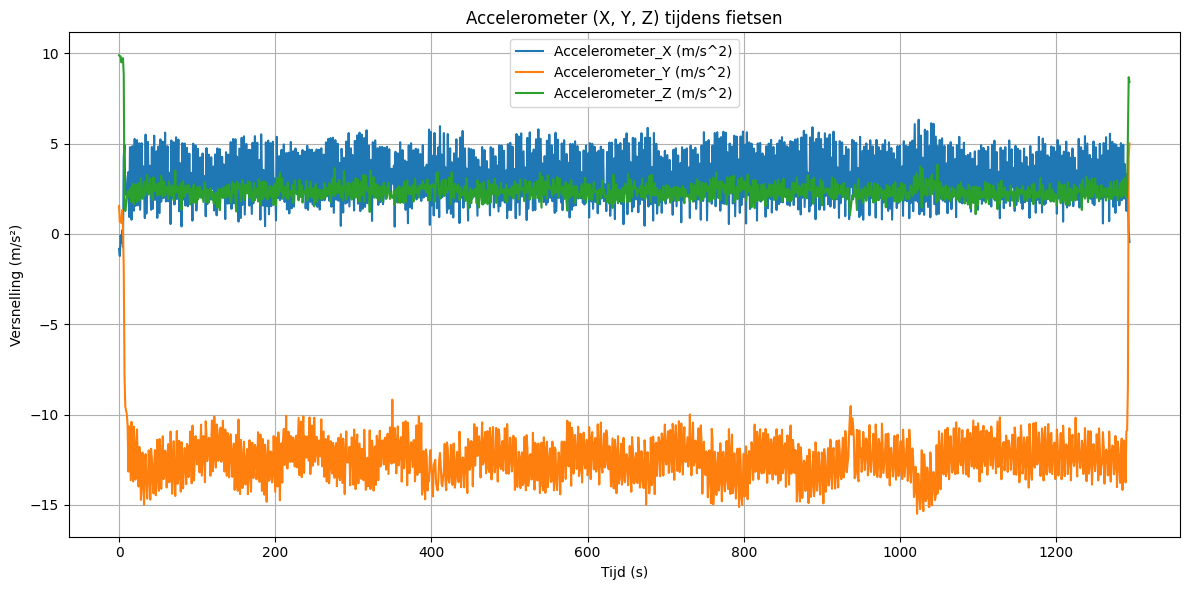

In [32]:
acc_cols = [col for col in final_df_rennen.columns if "Accelerometer" in col and "Linear" not in col]

# Plotten
plt.figure(figsize=(12, 6))

for col in acc_cols:
    plt.plot(final_df_rennen['Time (s)'], final_df_rennen[col], label=col)

plt.title("Accelerometer (X, Y, Z) tijdens fietsen")
plt.xlabel("Tijd (s)")
plt.ylabel("Versnelling (m/s²)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
final_df_metro.to_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\final_datasets\aggregated_metro.csv", index=False)
final_df_rennen.to_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\final_datasets\aggregated_rennen.csv", index=False)
final_df_fietsen.to_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\final_datasets\aggregated_fietsen.csv", index=False)
final_df_trein.to_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\final_datasets\aggregated_trein.csv", index=False)
final_df_auto.to_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\final_datasets\aggregated_auto.csv", index=False)